In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
fire_df = pd.read_csv("Resources/fire_data/fire_all_clean.csv", index_col="City_ID")
fire_df.head()

,Name,Admin unit,County,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Year,Month created (num),Month
City_ID,,,,,,,,,,,,,
0,Bridge Fire,Shasta-Trinity National Forest,Shasta,37.0,-122.309000,40.774000,2018-01-09,2017-10-31,70 days,2018,2017,10,October
1,Pala Fire,CAL FIRE San Diego Unit,San Diego,122.0,1.000000,1.000000,2009-05-25,2009-05-24,1 days,2009,2009,5,May
2,River Fire,CAL FIRE San Bernardino Unit,Inyo,407.0,-118.016510,36.602575,2013-02-28,2013-02-24,4 days,2013,2013,2,February
3,Fawnskin Fire,San Bernardino National Forest,San Bernardino,30.0,-116.941311,34.288877,2013-04-22,2013-04-20,2 days,2013,2013,4,April
4,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,274.0,-119.635004,37.116295,2013-05-01,2013-04-30,1 days,2013,2013,4,April


In [37]:
rainfall_df = pd.read_csv("Resources/weather_data/rainfall_all_years_clean.csv", index_col="City_ID")
rainfall_df.head()

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean
City_ID,,,,,,,
0,California,Alameda,0.63,March,2013,-2.24,2.87
1,California,Alpine,2.56,March,2013,-2.54,5.10
2,California,Amador,2.89,March,2013,-2.72,5.61
3,California,Butte,2.57,March,2013,-3.77,6.34
4,California,Calaveras,2.75,March,2013,-2.83,5.58


In [38]:
temperature_df = pd.read_csv("Resources/weather_data/temperature_all_years_clean.csv", index_col="City_ID")
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7772 entries, 0 to 7771
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            7772 non-null   object 
 1   County                           7772 non-null   object 
 2   Temperature (F)                  7772 non-null   float64
 3   Month                            7772 non-null   object 
 4   Year                             7772 non-null   int64  
 5   Anomaly (1901-2000 base period)  7772 non-null   float64
 6   1901-2000 Mean                   7772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 485.8+ KB


In [39]:
fire_vs_rainfall_all = pd.merge(rainfall_df, fire_df, on=["Month", "Year", "County"], how="outer")

fire_vs_rainfall_all

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean,Name,Admin unit,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Month created (num)
0,California,Alameda,0.63,March,2013,-2.24,2.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,Alpine,2.56,March,2013,-2.54,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,California,Amador,2.89,March,2013,-2.72,5.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,California,Butte,2.57,March,2013,-3.77,6.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,Calaveras,2.75,March,2013,-2.83,5.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,NaN,"El Dorado, Alpine, Amador",NaN,August,2021,NaN,NaN,Caldor Fire,El Dorado National Forest,221835.0,-120.537833,38.586000,2021-10-21,2021-08-14,68 days,2021.0,8.0
8650,NaN,"Riverside, San Diego",NaN,August,2021,NaN,NaN,Chaparral Fire,Cleveland National Forest,1427.0,-117.393090,33.484721,2021-09-01,2021-08-28,4 days,2021.0,8.0
8651,NaN,"Napa, Sonoma",NaN,September,2021,NaN,NaN,Fremont Fire,CAL FIRE Sonoma-Lake-Napa Unit,116.0,-122.416983,38.269863,2021-09-23,2021-09-22,1 days,2021.0,9.0
8652,NaN,"El Dorado, Placer",NaN,September,2022,NaN,NaN,Mosquito Fire,"Unified Command: Tahoe National Forest, El Dor...",76788.0,-120.744700,39.005910,2022-10-22,2022-09-06,46 days,2022.0,9.0


In [40]:
fire_vs_rainfall_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8654 entries, 0 to 8653
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            8608 non-null   object 
 1   County                           8654 non-null   object 
 2   Rainfall (inches)                8608 non-null   float64
 3   Month                            8654 non-null   object 
 4   Year                             8654 non-null   int64  
 5   Anomaly (1901-2000 base period)  8608 non-null   float64
 6   1901-2000 Mean                   8608 non-null   float64
 7   Name                             1943 non-null   object 
 8   Admin unit                       1934 non-null   object 
 9   Acres burned                     1943 non-null   float64
 10  Lon                              1943 non-null   float64
 11  Lat                              1943 non-null   float64
 12  Date extinguished   

In [41]:
fire_vs_rainfall_df = fire_vs_rainfall_all.dropna()

In [42]:
fire_vs_rainfall_df

,State,County,Rainfall (inches),Month,Year,Anomaly (1901-2000 base period),1901-2000 Mean,Name,Admin unit,Acres burned,Lon,Lat,Date extinguished,Date created,Duration (days),Year extinguished,Month created (num)
77,California,Madera,0.87,April,2013,-1.16,2.03,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,274.0,-119.635004,37.116295,2013-05-01,2013-04-30,1 days,2013.0,4.0
85,California,Napa,1.05,April,2013,-0.86,1.91,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,75.0,-122.350844,38.441792,2013-05-01,2013-04-30,1 days,2013.0,4.0
93,California,San Bernardino,0.02,April,2013,-0.36,0.38,Fawnskin Fire,San Bernardino National Forest,30.0,-116.941311,34.288877,2013-04-22,2013-04-20,2 days,2013.0,4.0
126,California,Glenn,0.31,May,2013,-0.54,0.85,306 Fire,CAL FIRE Tehama-Glenn Unit,217.0,-122.560862,39.514139,2013-05-05,2013-05-01,4 days,2013.0,5.0
134,California,Los Angeles,0.55,May,2013,0.23,0.32,Lake Fire,CAL FIRE/Los Angeles County,712.0,-118.610044,34.491490,2013-05-18,2013-05-17,1 days,2013.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8326,California,Fresno,0.59,May,2023,-0.24,0.83,Pistol Fire,CAL FIRE Fresno-Kings Unit,123.0,-119.680100,36.946600,2023-05-30,2023-05-30,0 days,2023.0,5.0
8349,California,Riverside,0.28,May,2023,0.12,0.16,66 Fire,CAL FIRE Riverside Unit,127.0,-116.092746,33.569342,2023-05-18,2023-05-15,3 days,2023.0,5.0
8350,California,Riverside,0.28,May,2023,0.12,0.16,Ramona Fire,Riverside County Fire,348.0,-117.033714,33.823424,2023-05-25,2023-05-22,3 days,2023.0,5.0
8518,California,Monterey,7.66,February,2024,3.56,4.10,Bryson Fire,CAL FIRE San Benito-Monterey Unit,11.0,-121.084104,35.811480,2024-02-27,2024-02-27,0 days,2024.0,2.0


<Figure size 1200x800 with 0 Axes>

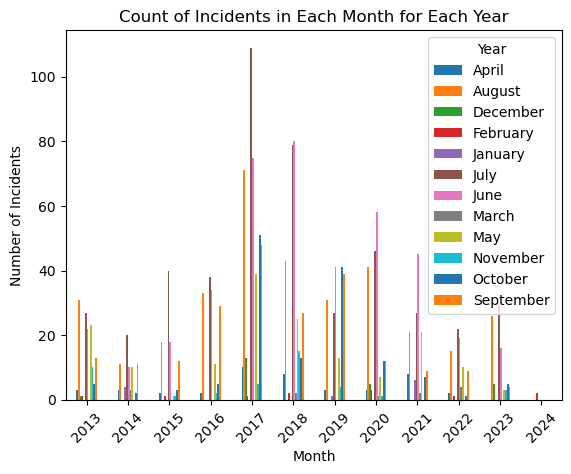

In [54]:
#relevant columns
monthly_data = fire_vs_rainfall_df[['Month','Year', 'Rainfall (inches)', 'Acres burned']]

grouped_by_year_month = monthly_data.groupby(['Year', 'Month'])
incidents_per_month_year = grouped_by_year_month.size()
incidents_per_month_year

plt.figure(figsize=(12, 8))
incidents_per_month_year.unstack().plot(kind='bar')
plt.title('Count of Incidents in Each Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

In [9]:
list(fire_vs_rainfall_df.columns)

['State',
 'County',
 'Rainfall (inches)',
 'Month',
 'Year',
 'Anomaly (1901-2000 base period)',
 '1901-2000 Mean',
 'Name',
 'Admin unit',
 'Acres burned',
 'Lon',
 'Lat',
 'Date extinguished',
 'Date created',
 'Duration (days)',
 'Year extinguished',
 'Month created (num)']

In [59]:
clean_fire_rainfall = fire_vs_rainfall_df[[
 #'County',
 'Rainfall (inches)',
 'Month',
 'Year',
 'Acres burned',
 #'Duration (days)',
 #'Year extinguished',
 #'Month created (num)'
                                          ]]

#'Lon',
#'Lat',

clean_fire_rainfall.head()

,Rainfall (inches),Month,Year,Acres burned
77,0.87,April,2013,274.0
85,1.05,April,2013,75.0
93,0.02,April,2013,30.0
126,0.31,May,2013,217.0
134,0.55,May,2013,712.0


In [60]:
#Creating a new df for fire vs rainfall grouped by month
month_fire_rainfall = clean_fire_rainfall.groupby(["Month"])
month_fire_rainfall.head()

month_df = month_fire_rainfall.agg(
    #Sum rainfall
    sum_rainfall = ("Rainfall (inches)", "sum"),
    avg_rainfall = ("Rainfall (inches)", "mean"),

    sum_acres_burned = ("Acres burned", "sum"),
    avg_acres_burned = ("Acres burned", "mean")

)

month_df = month_df.round(0) 
month_df

,sum_rainfall,avg_rainfall,sum_acres_burned,avg_acres_burned
Month,,,,
April,53.0,1.0,14373.0,327.0
August,71.0,0.0,1698965.0,4982.0
December,16.0,1.0,39973.0,1666.0
February,35.0,3.0,7347.0,668.0
January,37.0,3.0,4685.0,426.0
July,55.0,0.0,1679930.0,3613.0
June,66.0,0.0,312778.0,748.0
March,28.0,2.0,2228.0,186.0
May,77.0,0.0,121285.0,744.0


In [63]:
#Creating a new df for fire vs rainfall grouped by month
year_fire_rainfall = clean_fire_rainfall.groupby(["Year"])
year_fire_rainfall.head()

year_df = year_fire_rainfall.agg(
    #Sum rainfall
    sum_rainfall = ("Rainfall (inches)", "sum"),
    avg_rainfall = ("Rainfall (inches)", "mean"),

    sum_acres_burned = ("Acres burned", "sum"),
    avg_acres_burned = ("Acres burned", "mean")

)

year_df = year_df.round(0) 

year_df["avg_acres_burned(scaled_per_100)"] = year_df["avg_acres_burned"]/ 100
year_df

,sum_rainfall,avg_rainfall,sum_acres_burned,avg_acres_burned,avg_acres_burned(scaled_per_100)
Year,,,,,
2013,56.0,0.0,492134.0,3619.0,36.19
2014,31.0,0.0,288442.0,3898.0,38.98
2015,43.0,0.0,387163.0,4033.0,40.33
2016,44.0,0.0,446456.0,2899.0,28.99
2017,152.0,0.0,841581.0,1994.0,19.94
2018,116.0,0.0,590863.0,2010.0,20.10
2019,89.0,0.0,196347.0,982.0,9.82
2020,26.0,0.0,321100.0,1699.0,16.99
2021,80.0,1.0,776959.0,5322.0,53.22


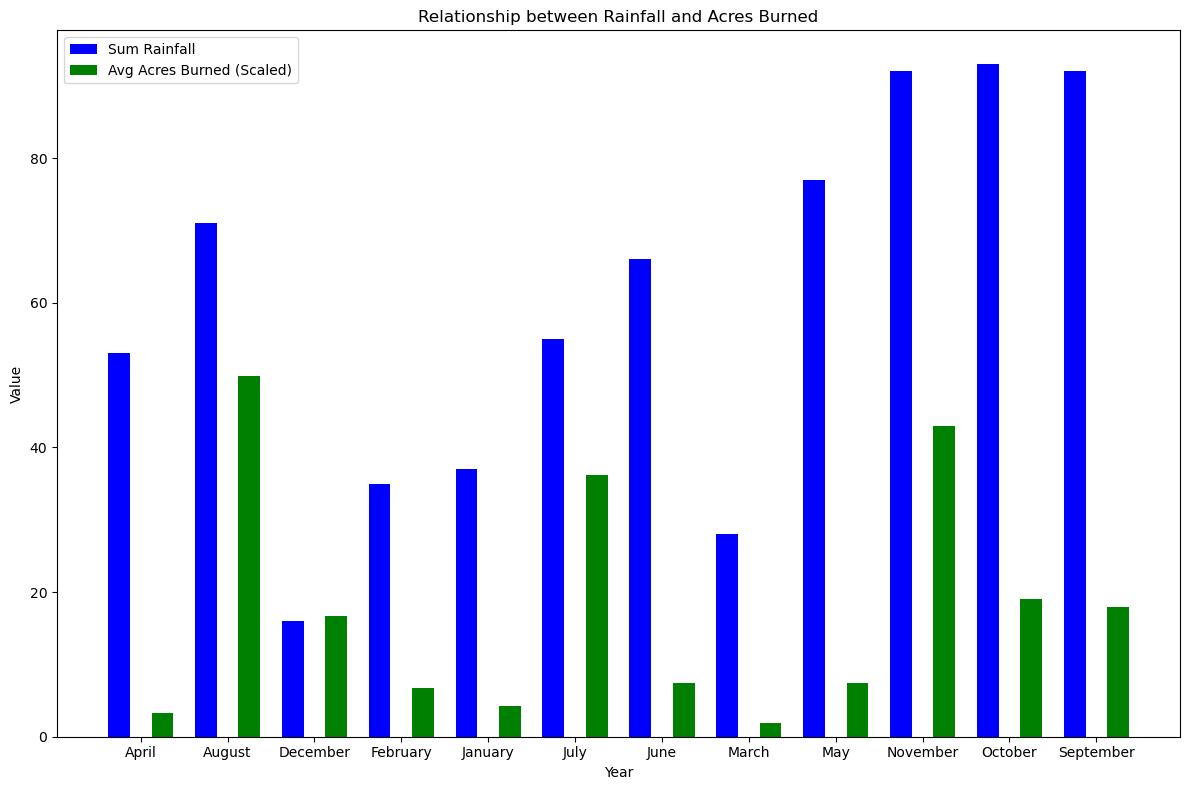

In [66]:
import matplotlib.pyplot as plt

# Data
years = month_df.index
sum_rainfall = month_df['sum_rainfall']
#sum_acres_burned = month_df['sum_acres_burned']
avg_acres_burned_scaled = month_df['avg_acres_burned'] / 100  # Scale the values by dividing by 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.25

# Positions for the bars
index = range(len(years))

# Plotting the bars
plt.bar(index, sum_rainfall, color='blue', width=bar_width, label='Sum Rainfall')
#plt.bar([i + bar_width for i in index], sum_acres_burned, color='orange', width=bar_width, label='Sum Acres Burned')
plt.bar([i + 2*bar_width for i in index], avg_acres_burned_scaled, color='green', width=bar_width, label='Avg Acres Burned (Scaled)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Relationship between Rainfall and Acres Burned')
plt.xticks([i + bar_width for i in index], years)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


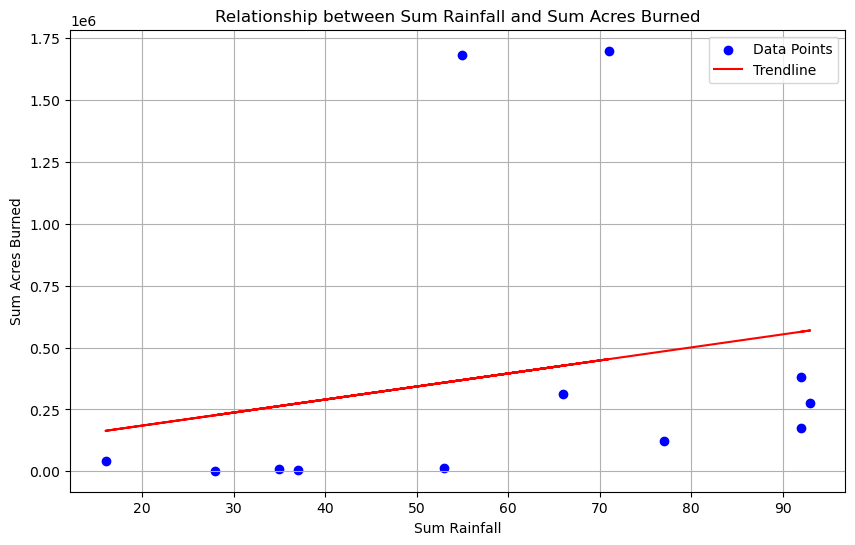

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Data
rainfall = month_df['sum_rainfall']
acres_burned = month_df['sum_acres_burned']

# Fit a trendline (linear regression)
slope, intercept = np.polyfit(rainfall, acres_burned, 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(rainfall, acres_burned, color='blue', label='Data Points')
plt.plot(rainfall, slope * rainfall + intercept, color='red', label='Trendline')

# Labels and title
plt.xlabel('Sum Rainfall')
plt.ylabel('Sum Acres Burned')
plt.title('Relationship between Sum Rainfall and Sum Acres Burned')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

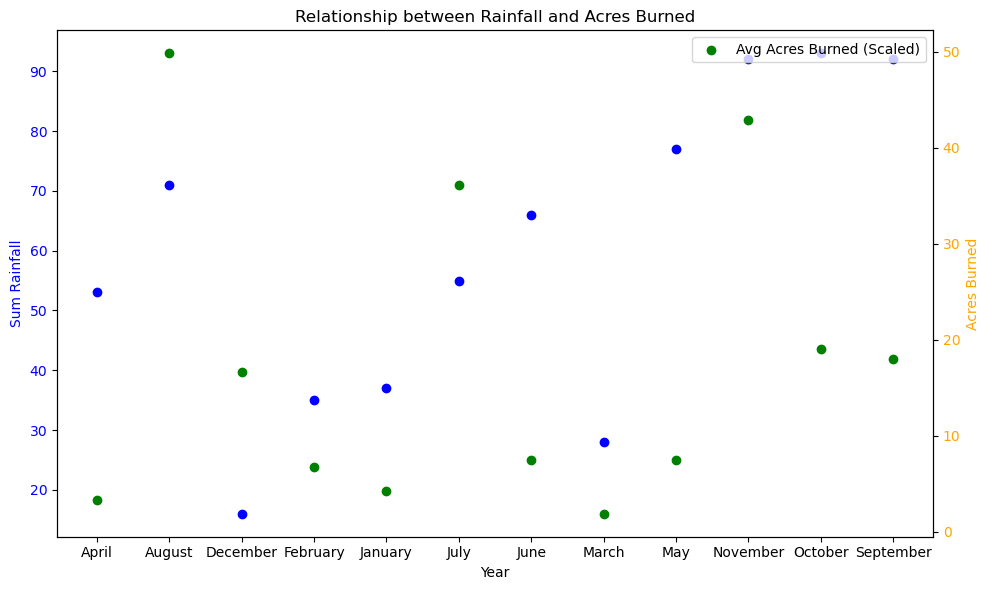

In [73]:
import matplotlib.pyplot as plt

# Data
years = month_df.index
rainfall = month_df['sum_rainfall']
#acres_burned = month_df['sum_acres_burned']
avg_acres_burned_scaled = month_df['avg_acres_burned'] / 100  # Scale the values by dividing by 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for sum of rainfall
ax1.scatter(years, rainfall, color='blue', label='Sum Rainfall')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sum Rainfall', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for sum of acres burned and average acres burned (scaled)
ax2 = ax1.twinx()
#ax2.scatter(years, acres_burned, color='orange', label='Sum Acres Burned')
ax2.scatter(years, avg_acres_burned_scaled, color='green', label='Avg Acres Burned (Scaled)')
ax2.set_ylabel('Acres Burned', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Relationship between Rainfall and Acres Burned')
fig.tight_layout()
plt.legend()

# Show plot
plt.show()


In [ ]:
#trendline of average rainfall and count of fire incidents

In [ ]:

# count of incidents in each month (apply to the groupby object)
#mean or count of acres burned per month vs rainfall
#mean or count of acres burned per year vs rainfall
